In [39]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [41]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [42]:
single_image= X_train[0]

In [10]:
single_image.shape

(28, 28)

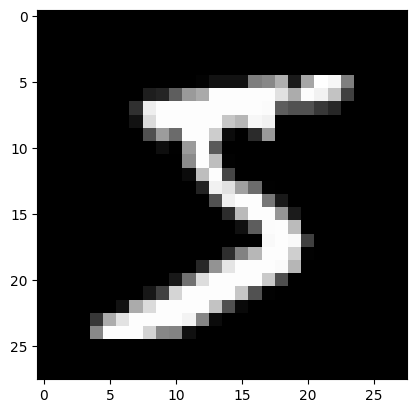

In [11]:
plt.imshow(single_image,cmap='gray')

In [12]:
y_train.shape

(60000,)

In [13]:
X_train.min()

0

In [14]:
X_train.max()

255

In [15]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [16]:
X_train_scaled.min()

0.0

In [17]:
X_train_scaled.max()

1.0

In [18]:
y_train[0]

5

In [19]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [20]:
type(y_train_onehot)

numpy.ndarray

In [21]:
y_train_onehot.shape

(60000, 10)

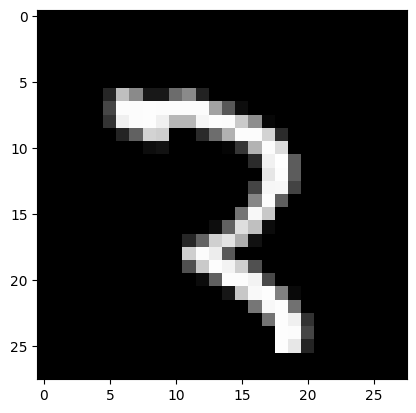

In [22]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [23]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [25]:

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 14s 28ms/step - loss: 0.3188 - accuracy: 0.9072 - val_loss: 0.1104 - val_accuracy: 0.9665
Epoch 2/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0933 - accuracy: 0.9724 - val_loss: 0.0694 - val_accuracy: 0.9774
Epoch 3/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.0604 - val_accuracy: 0.9787
Epoch 4/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0570 - val_accuracy: 0.9820
Epoch 5/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0474 - val_accuracy: 0.9849
Epoch 6/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 7/8
469/469 [==============================] - 12s 26ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0456 - val_accuracy: 0.9853

In [28]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.318831,0.907167,0.110400,0.9665
1,0.093320,0.972350,0.069436,0.9774
2,0.061826,0.981517,0.060371,0.9787
3,0.047724,0.985383,0.056997,0.9820
4,0.037920,0.988350,0.047416,0.9849


<Axes: >

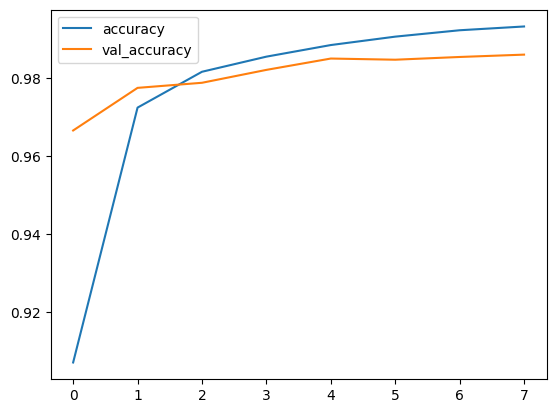

In [43]:
metrics[['accuracy','val_accuracy']].plot()



<Axes: >

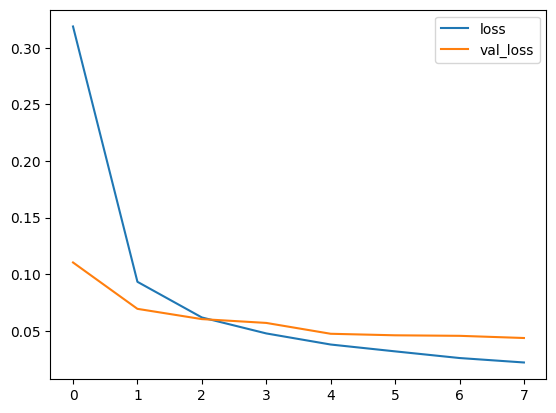

In [44]:
metrics[['loss','val_loss']].plot()



In [45]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)



313/313 [==============================] - 1s 3ms/step


In [46]:
print(confusion_matrix(y_test,x_test_predictions))



[[ 972    0    2    0    0    1    3    1    1    0]
 [   0 1131    0    1    0    0    1    1    1    0]
 [   2    4 1006    4    2    0    0    9    3    2]
 [   0    0    0  999    0    5    0    2    4    0]
 [   0    0    0    0  976    0    0    0    0    6]
 [   1    0    0    4    0  886    1    0    0    0]
 [   7    3    1    2    3    1  939    0    2    0]
 [   1    2    3    0    0    0    0 1017    1    4]
 [   4    1    0    2    2    3    1    4  950    7]
 [   2    2    0    3    7    6    0    4    2  983]]


In [47]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
img = image.load_img('8.png')
type(img)

PIL.Image.Image

In [68]:
img = image.load_img('/content/8.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [69]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 16ms/step


In [70]:
print(x_single_prediction)

[8]


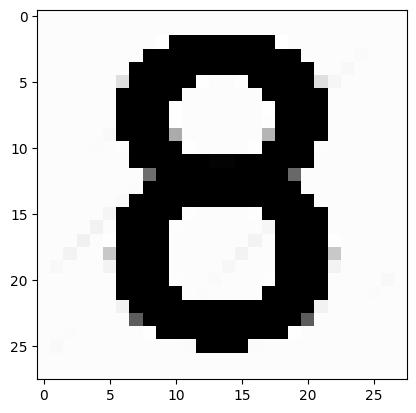

In [71]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [72]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [73]:
print(x_single_prediction)

[8]
